<div >
<img src = "figures/banner.png" />
</div>

# Lecture 7: Machine Learning: Recap

 - El objetivo es predecir $y$ dadas otras variables $X$. Ej: precio vivienda dadas las características
  
- Asumimos que el link entre $y$ and $X$ esta dado por:

\begin{align}
  y = f(X) + u
\end{align}


  - donde $f(X)$ es cualquier función, 
  
  -  $u$ una variable aleatoria no observable $E(u)=0$ and $V(u) = \sigma^2$


<div >
<img src = "figures_noteboook/fig_1a-1.png" />
</div>

<div >
<img src = "figures_noteboook/fig_1f.png" />
</div>

- ML nos interesa la predicción fuera de muestra
  
- Overfit: modelos complejos predicen muy bien dentro de muestra, pero tienden a hacer un trabajo fuera de muestra 
  
- Hay que elegir el nivel adecuado de complejidad 

<div >
<img src = "figures_noteboook/fig_1g-1.png" />
</div>

<div >
<img src = "figures_noteboook/fig_1h-1.png" />
</div>

## Selección de Modelos


  - ML nos interesa la predicción fuera de muestra
  
  - Overfit: modelos complejos predicen muy bien dentro de muestra, pero tienden a hacer un mal trabajo fuera de muestra 
  
  - Hay que elegir el modelo que ``mejor'' prediga
  

    - Métodos de Remuestreo
    
        - Enfoque del conjunto de validación
        - Loocv
        - Validación cruzada en K-partes (5 o 10)
    

##  Instalar/llamar las librerías de la clase

In [1]:
require(pacman) 
p_load(tidyverse) 

Loading required package: pacman



## Cargando los Datos


### Cargando Datos de Propiedades

In [2]:
### **0.1 fijar semilla**
set.seed(101010)

### **0.2 leer datos**
house<-readRDS(url("https://github.com/ignaciomsarmiento/datasets/raw/main/data_houses_inmob.Rds"))
summary(house$price)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.000e+00 3.569e+08 5.750e+08 8.232e+08 9.500e+08 3.220e+10 

In [3]:
class(house)

[1] "data.frame"

# Validation Set  Approach

The first method to evaluate out-of-sample performance is the validation set approach. In this approach, a fixed portion of the data is designated as the validation set, and the model is trained on the remaining data. The model's performance is then evaluated on the validation set. These partitions are usually called:

   - Training sample: to build/estimate/train the model
   - Testing (validation, hold-out) sample:  to evaluate its performance 

Partitions can be of any size. Usually, 70%-30% or 80%-20% are used. Graphically, a 70%-30% partition looks like:     
    
<div>
<img src="figures_noteboook/30-70.png" width="500"/>
</div>

In [4]:
### **0.3 partir la muestra**
set.seed(101010)
sample_test <- sample(x = nrow(house) , size = nrow(house)*0.3)

test <- house[sample_test,]

train <- house[-sample_test,]

## Trade off Sesgo-Varianza

### Modelo 1

In [5]:
specification1 <- lm(price~1,data=train) 

## summary
summary(specification1)


Call:
lm(formula = price ~ 1, data = train)

Residuals:
       Min         1Q     Median         3Q        Max 
-8.287e+08 -4.697e+08 -2.587e+08  1.213e+08  1.317e+10 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 828667587    8620112   96.13   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 850900000 on 9743 degrees of freedom


In [6]:

## predicciones
test$y_1 <- predict(object = specification1 , newdata = test) 

test$specification1 <- predict(specification1 , newdata = test)

## MSE
#test$price-test$y_1
#(test$price-test$y_1)^2
#mean((test$price-test$y_1)^2)

mse1 <- with(test,mean((price-specification1)^2))
mse1

[1] 8.61899e+17

In [7]:
sqrt(mse1)

[1] 928385143

In [8]:
## Almacenar el resultado del modelo
models <- tibble(modelo=rep(NA,5),MSE=rep(NA,5))
models$modelo[1] = "Modelo 1"
models$MSE[1] = mse1


### Modelo 2

In [10]:

### **1.2 Puede mejorarse la predicción**
specification2 <- lm(price~rooms,data=train)

test$specification2 <-predict(specification2,newdata = test) 

mse2 <- with(test,mean((price-specification2)^2))
mse2



[1] 8.461888e+17

Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_line()`).”


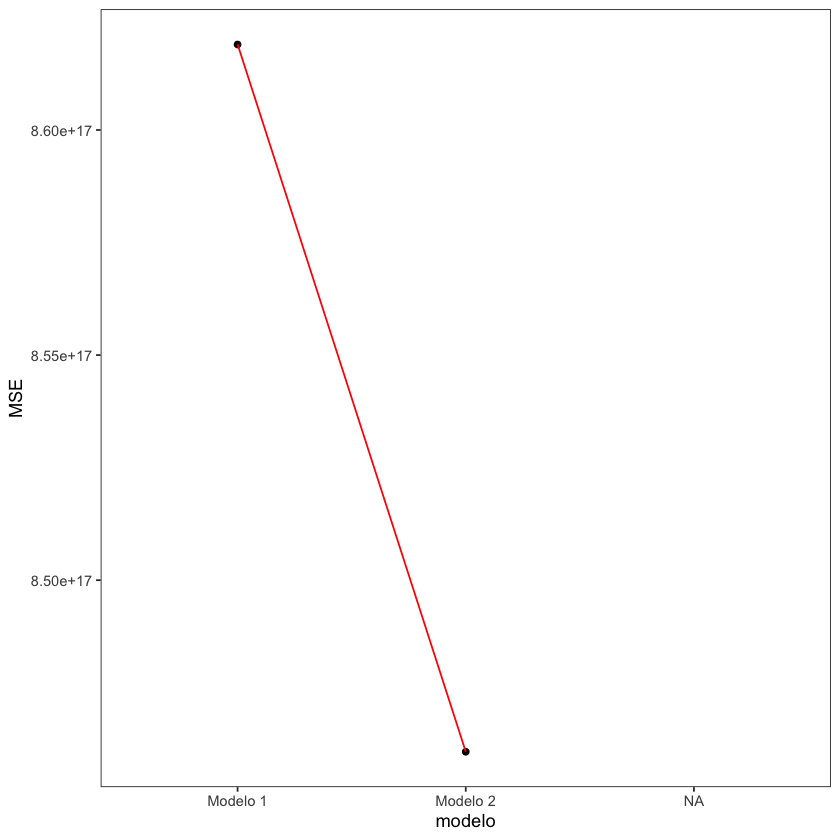

In [11]:

models$modelo[2] = "Modelo 2"
models$MSE[2] = mse2

ggplot(data=models , aes(x=modelo , y=MSE , group=1)) + 
geom_point() + geom_line(col="red") + theme_test()

In [13]:
colnames(house)

[1] "l4"            "rooms"         "bathrooms"     "surface_total"
 [5] "price"         "property_type" "dist_cbd"      "dist_cole"    
 [9] "dist_park"     "luces_2019"    "luces_2021"    "cambio_activ"

## 1.3 Que pasa si incluimos mas variables


### Modelo 3

In [14]:

## modelo 3
specification3 <- lm(price~as.factor(l4)+rooms+bathrooms+surface_total,data=train) 

test$specification3<-predict(specification3,newdata = test) 

mse3 <- with(test,mean((price-specification3)^2,na.rm=T))
mse3

[1] 5.932142e+17

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_line()`).”


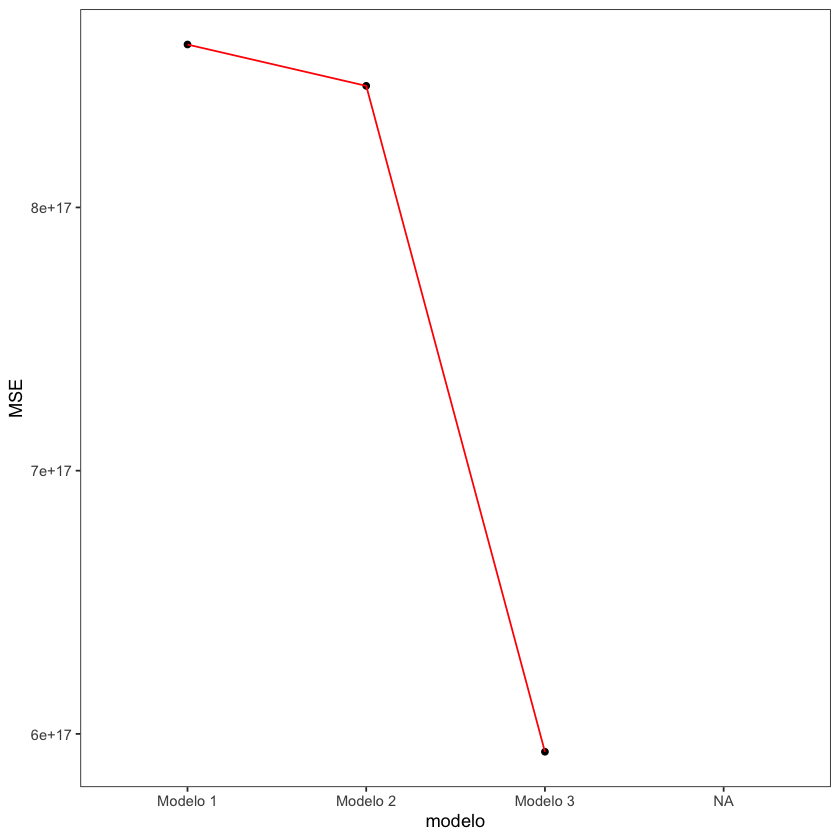

In [15]:

models$modelo[3] = "Modelo 3"
models$MSE[3] = mse3

ggplot(data=models , aes(x=modelo , y=MSE , group=1)) + 
geom_point() + geom_line(col="red") + theme_test()

### Modelo 4

In [17]:

specification4 <- lm(price~as.factor(l4)+rooms+bathrooms+surface_total+dist_cole+dist_park,data=train) 

test$specification4<-predict(specification4,newdata = test) 

mse4 <- with(test,mean((price-specification4)^2,na.rm=T))
mse4

[1] 5.932382e+17

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


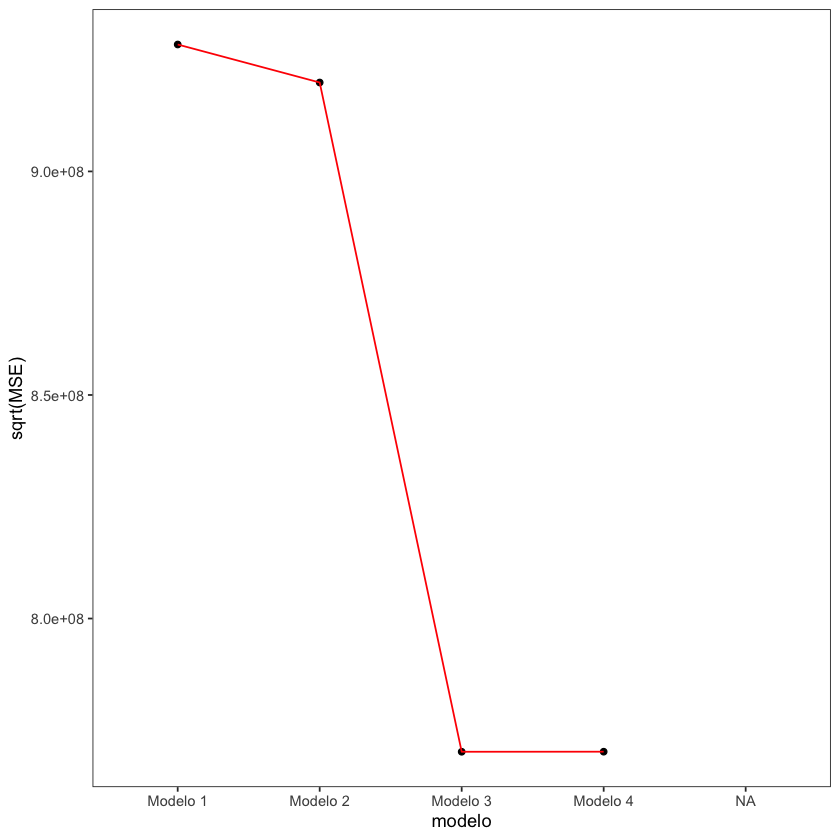

In [18]:

models$modelo[4] = "Modelo 4"
models$MSE[4] = mse4

ggplot(data=models , aes(x=modelo , y=sqrt(MSE) , group=1)) + 
geom_point() + geom_line(col="red") + theme_test()

###  ¿Hay un límite para esta mejora?

In [ ]:
specification5 <- lm(price~ as.factor(l4) + poly(rooms,2):poly(bedrooms,2):poly(bathrooms,2) + surface_total:lon:lat , data=train) 

test$specification5<-predict(specification5,newdata = test) 

mse5 <- with(test,mean((price-specification5)^2,na.rm=T))
mse5

models$modelo[5] = "Modelo 5"
models$MSE[5] = mse5

ggplot(data=models , aes(x=modelo , y=MSE , group=1)) + 
geom_point() + geom_line(col="red") + theme_test()
